In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# used for import a module outside the folder
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

# Linear Regression model

In [2]:
import logging
from logger import init_logger

init_logger(Path("..", "logs", "linear_regression.log"))
logger = logging.getLogger("main")

In [3]:
from etl.extract import load_data
from etl.transform import preprocess_data

In [4]:
df_train = load_data(year=2022, month=1)
df_test = load_data(year=2022, month=2)
process_df_train = preprocess_data(df_train)
process_df_test = preprocess_data(df_test)
process_df_train.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,duration
0,2022-01-01 00:35:40,2022-01-01 00:53:29,142,236,1069.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,236,42,504.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,166,166,538.0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,114,68,602.0
4,2022-01-01 00:36:48,2022-01-01 01:14:20,68,163,2252.0


In [5]:
process_df_test.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,duration
0,2022-02-01 00:06:58,2022-02-01 00:19:24,138,252,746.0
1,2022-02-01 00:38:22,2022-02-01 00:55:55,138,41,1053.0
2,2022-02-01 00:03:20,2022-02-01 00:26:59,138,200,1419.0
3,2022-02-01 00:08:00,2022-02-01 00:28:05,239,200,1205.0
4,2022-02-01 00:06:48,2022-02-01 00:33:07,138,125,1579.0


Applying a dict vectorizer

In [6]:
from sklearn.feature_extraction import DictVectorizer

CATEGORICAL_COLUMNS = ["PULocationID", "DOLocationID"]
NUMERICAL_COLUMNS = ["PULocationID", "DOLocationID"]
TARGET = "duration"

dv = DictVectorizer()
train_dicts = process_df_train[CATEGORICAL_COLUMNS].astype(str).to_dict(orient="records")
test_dicts = process_df_test[CATEGORICAL_COLUMNS].astype(str).to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)
y_train = process_df_train[TARGET].values

X_test = dv.transform(test_dicts)
y_test = process_df_test[TARGET].values

In [7]:
X_train

<2458610x518 sparse matrix of type '<class 'numpy.float64'>'
	with 4917220 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

/home/nahum/Documents/nyc-yellow-taxi/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nahum/Documents/nyc-yellow-taxi/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


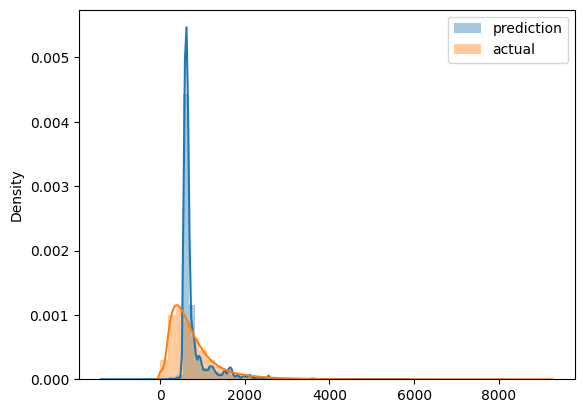

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 
# TODO: change to a histplot
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()
plt.show()

/home/nahum/Documents/nyc-yellow-taxi/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nahum/Documents/nyc-yellow-taxi/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


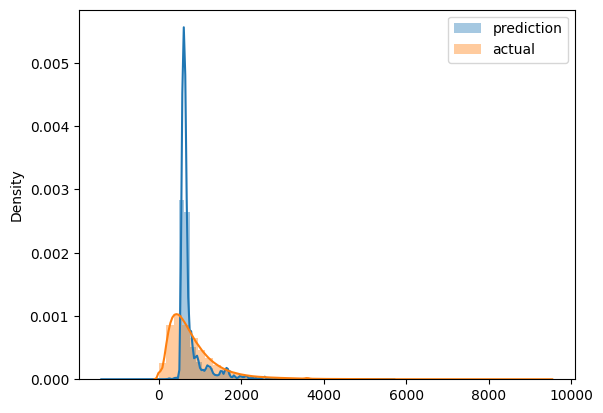

In [13]:
y_pred_test = lr.predict(X_test)
sns.distplot(y_pred_test, label='prediction')
sns.distplot(y_test, label='actual')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, y_pred, squared=False)

logger.info(f"rmse for LinearRegression: {rmse:02f}")

2022-09-01 23:04:42,597 - INFO : rmse for LinearRegression: 471.746989


In [14]:
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
logger.info(f"rmse for LinearRegression test dataset: {rmse:02f}")

2022-09-01 23:17:11,318 - INFO : rmse for LinearRegression test dataset: 545.970941
